In [62]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


VOID S1373

In [81]:
t=np.loadtxt('halosprop_2rvir_2_parallel.dat')

In [82]:
xbox=403.8960
ybox=459.8882
zbox=440.9021

x=408.205481  
y=457.777839
z=441.538681

x = x - xbox + 250
y = y - ybox + 250
z = z - zbox + 250

d=np.sqrt((t[:,0]-x)**2 + (t[:,1]-y)**2 + (t[:,2]-z)**2)
dx=t[:,8]-x
dy=t[:,9]-y
dz=t[:,10]-z

mask0, = np.where( d < 30.)  # voy a filtrar solo las particulas que estan cerca del void

In [83]:
t=t[mask0,:]
d=np.sqrt((t[:,0]-x)**2 + (t[:,1]-y)**2 + (t[:,2]-z)**2)

In [84]:
masa_gas=1.81729961E-02
masa_dm=9.32880491E-02
mask,= np.where((t[:,5]>0) & (t[:,8]>1))

dm=t[mask,6]*masa_dm*1e10
DM = np.log10(t[mask,6]*masa_dm*1e10)
GAS= (t[mask,5]*masa_gas*1e10)
EST= (t[mask,8]*1e10)
bar=EST+GAS
ESTRELLAS= np.log10(EST)
SOLOGAS=np.log10(GAS)
BARIONES= np.log10(EST+GAS)

In [104]:
xbines = np.arange(11,15,.5)
x=[]
y=[]
z=[]
v=[]
dx=[]
dy=[]
dz=[]
dv=[]
for i in xbines:
    rango, = np.where((DM > i) & (DM < i + .5))
    x.append(np.mean(DM[rango]))
    dx.append(np.std(DM[rango]))
    y.append(np.mean(ESTRELLAS[rango]))
    dy.append(np.std(ESTRELLAS[rango]))
    z.append(np.mean(BARIONES[rango]))
    dz.append(np.std(BARIONES[rango]))
    v.append(np.mean(SOLOGAS[rango]))
    dv.append(np.std(SOLOGAS[rango]))

x=np.array(x)
dx=np.array(dx)
y=np.array(y)
dy=np.array(dy)
z=np.array(z)
dz=np.array(dz)
v=np.array(v)
dv=np.array(dv)

In [135]:
import matplotlib.font_manager as font_manager

Text(0, 0.5, '$M_{barionica} [M_{\\odot}]$')

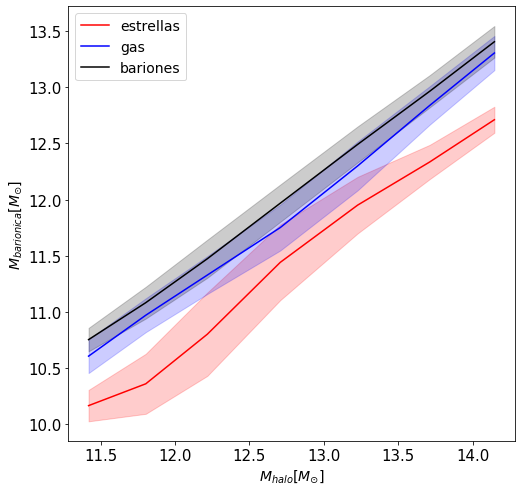

In [142]:
matplotlib.rc('xtick', labelsize=15)     
matplotlib.rc('ytick', labelsize=15)
axis_font = {'fontname':'Arial', 'size':'14'}

plt.figure(figsize=(8,8))
plt.plot(x,y,color='red',label='estrellas')
plt.fill_between(x, y - dy, y + dy,color='red', alpha=0.2)
plt.plot(x,v,color='blue',label='gas')
plt.fill_between(x, v - dv, v + dv,color='blue', alpha=0.2)
plt.plot(x,z,color='black',label='bariones')
plt.fill_between(x, z - dz, z + dz,color='black', alpha=0.2)
plt.legend(fontsize=14)

plt.xlabel("$M_{halo} [M_{\odot}]$", **axis_font)
plt.ylabel("$M_{barionica} [M_{\odot}]$", **axis_font)

In [139]:
plt.legend?

Signature: plt.legend(*args, **kwargs)
Docstring:
Place a legend on the axes.

Call signatures::

    legend()
    legend(labels)
    legend(handles, labels)

The call signatures correspond to three different ways how to use
this method.

**1. Automatic detection of elements to be shown in the legend**

The elements to be added to the legend are automatically determined,
when you do not pass in any extra arguments.

In this case, the labels are taken from the artist. You can specify
them either at artist creation or by calling the
:meth:`~.Artist.set_label` method on the artist::

    line, = ax.plot([1, 2, 3], label='Inline label')
    ax.legend()

or::

    line.set_label('Label via method')
    line, = ax.plot([1, 2, 3])
    ax.legend()

Specific lines can be excluded from the automatic legend element
selection by defining a label starting with an underscore.
This is default for all artists, so calling `Axes.legend` without
any arguments and without setting the labels manually will 

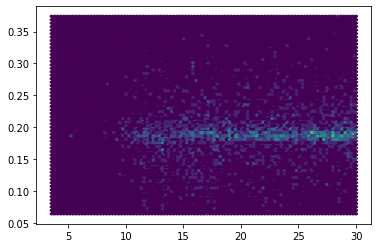

In [26]:
plt.hexbin(d[mask],bar/dm)

In [27]:
len(bar)

2479